In [1]:
# import modules
import sys
import os
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('coin_Bitcoin.csv')
df.head()

SNo     Name Symbol                 Date        High         Low  \
0    1  Bitcoin    BTC  2013-04-29 23:59:59  147.488007  134.000000   
1    2  Bitcoin    BTC  2013-04-30 23:59:59  146.929993  134.050003   
2    3  Bitcoin    BTC  2013-05-01 23:59:59  139.889999  107.720001   
3    4  Bitcoin    BTC  2013-05-02 23:59:59  125.599998   92.281898   
4    5  Bitcoin    BTC  2013-05-03 23:59:59  108.127998   79.099998   

         Open       Close  Volume     Marketcap  
0  134.444000  144.539993     0.0  1.603769e+09  
1  144.000000  139.000000     0.0  1.542813e+09  
2  139.000000  116.989998     0.0  1.298955e+09  
3  116.379997  105.209999     0.0  1.168517e+09  
4  106.250000   97.750000     0.0  1.085995e+09

In [3]:
df.tail()

SNo     Name Symbol                 Date          High           Low  \
2986  2987  Bitcoin    BTC  2021-07-02 23:59:59  33939.588699  32770.680780   
2987  2988  Bitcoin    BTC  2021-07-03 23:59:59  34909.259899  33402.696536   
2988  2989  Bitcoin    BTC  2021-07-04 23:59:59  35937.567147  34396.477458   
2989  2990  Bitcoin    BTC  2021-07-05 23:59:59  35284.344430  33213.661034   
2990  2991  Bitcoin    BTC  2021-07-06 23:59:59  35038.536363  33599.916169   

              Open         Close        Volume     Marketcap  
2986  33549.600177  33897.048590  3.872897e+10  6.354508e+11  
2987  33854.421362  34668.548402  2.438396e+10  6.499397e+11  
2988  34665.564866  35287.779766  2.492431e+10  6.615748e+11  
2989  35284.344430  33746.002456  2.672155e+10  6.326962e+11  
2990  33723.509655  34235.193451  2.650126e+10  6.418992e+11

In [4]:
# check unique values in each column
df.nunique()

SNo          2991
Name            1
Symbol          1
Date         2991
High         2981
Low          2985
Open         2984
Close        2978
Volume       2750
Marketcap    2990
dtype: int64

In [5]:
# drop Name and Symbol columns
df.drop(['Name', 'Symbol'], axis=1, inplace=True)

In [6]:
df.describe()

SNo          High           Low          Open         Close  \
count  2991.000000   2991.000000   2991.000000   2991.000000   2991.000000   
mean   1496.000000   6893.326038   6486.009539   6700.146240   6711.290443   
std     863.571653  11642.832456  10869.032130  11288.043736  11298.141921   
min       1.000000     74.561096     65.526001     68.504997     68.431000   
25%     748.500000    436.179001    422.879486    430.445496    430.569489   
50%    1496.000000   2387.610107   2178.500000   2269.889893   2286.409912   
75%    2243.500000   8733.926948   8289.800459   8569.656494   8576.238715   
max    2991.000000  64863.098908  62208.964366  63523.754869  63503.457930   

             Volume     Marketcap  
count  2.991000e+03  2.991000e+03  
mean   1.090633e+10  1.208761e+11  
std    1.888895e+10  2.109438e+11  
min    0.000000e+00  7.784112e+08  
25%    3.036725e+07  6.305579e+09  
50%    9.460360e+08  3.741503e+10  
75%    1.592015e+10  1.499957e+11  
max    3.509679e+11  1.186364e+12

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2991 non-null   int64  
 1   Date       2991 non-null   object 
 2   High       2991 non-null   float64
 3   Low        2991 non-null   float64
 4   Open       2991 non-null   float64
 5   Close      2991 non-null   float64
 6   Volume     2991 non-null   float64
 7   Marketcap  2991 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 187.1+ KB


In [8]:
#remove time in the Date column
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.date
# convert Date column to int
df['Date'] = pd.to_datetime(df['Date']).astype(np.int64)


In [9]:
# clean data for missing values
df.isnull().sum()


SNo          0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2991 non-null   int64  
 1   Date       2991 non-null   int64  
 2   High       2991 non-null   float64
 3   Low        2991 non-null   float64
 4   Open       2991 non-null   float64
 5   Close      2991 non-null   float64
 6   Volume     2991 non-null   float64
 7   Marketcap  2991 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 187.1 KB


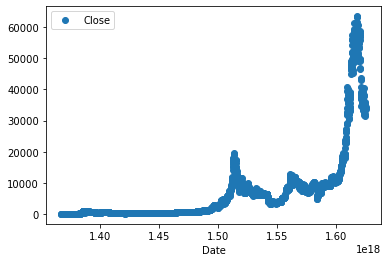

In [11]:
# visualize df
# line chart
df.plot(x='Date', y='Close', style='o')
plt.show()

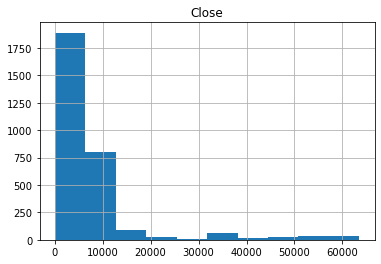

In [12]:
# histogram
df.hist(column='Close')
plt.show()

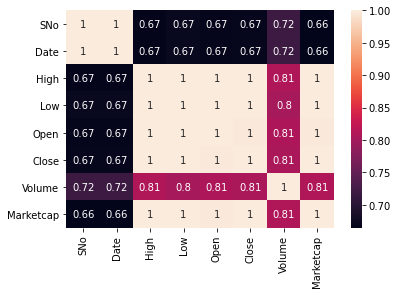

In [13]:
# seaborn heatmap
sns.heatmap(df.corr(), annot=True)
plt.show()

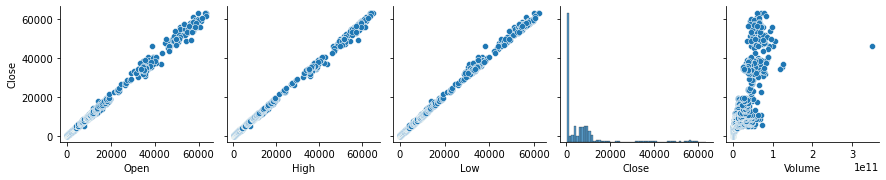

<Figure size 432x288 with 0 Axes>

In [14]:
# pairplot
sns.pairplot(data=df, x_vars=['Open', 'High', 'Low', 'Close', 'Volume'], y_vars='Close')
plt.show()
# save figure
plt.savefig('plots/pairplot.png')

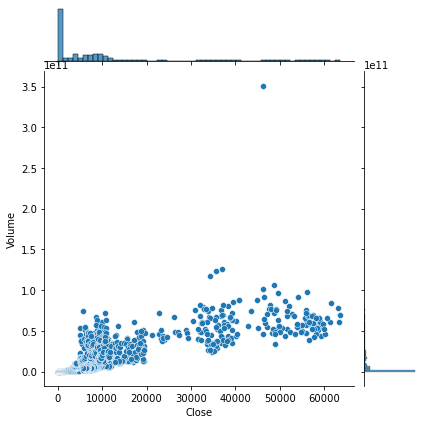

<Figure size 432x288 with 0 Axes>

In [15]:
# joinplot
sns.jointplot(x='Close', y='Volume', data=df)
plt.show()

# save figure
plt.savefig('plots/jointplot.png')

In [16]:
# choose a model and train it
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df.drop(['Close'], axis=1)
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
lm = LinearRegression()
lm.fit(X_train, y_train)


LinearRegression()

In [18]:
# evaluate the model
print('coefficients', lm.coef_)

coefficients [ 6.00456638e-18  9.92785131e-16  5.03469589e-01  2.52641593e-01
 -2.69447143e-01 -3.92380687e-09  2.72086839e-08]


In [19]:
predictions = lm.predict(X_test)

In [29]:
# show predictions in appropriate format
predictions = pd.DataFrame(predictions, columns=['Predictions'])
print(predictions)


     Predictions
0    1256.541855
1    7989.044849
2     312.879424
3    9468.974862
4     568.476482
..           ...
594  3218.732366
595   494.403168
596  5994.630143
597  7828.871864
598   725.738992

[599 rows x 1 columns]


Text(0, 0.5, 'Predictions')

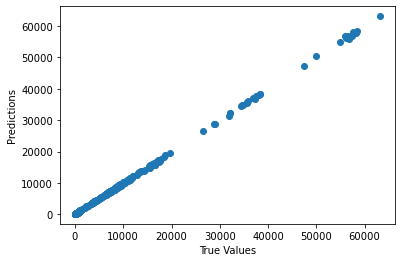

In [21]:
# Create a scatterplot of the real test values versus the predicted values.
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [22]:
# model Evaluation
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 93.43855076025645
MSE: 22617.445536607305
RMSE: 150.39097558233775


In [23]:
# get accuracy
print('r2_score:', metrics.r2_score(y_test, predictions))

r2_score: 0.9997692679987702


/home/retech/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


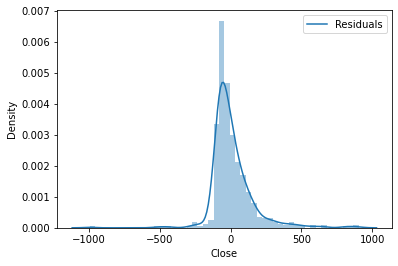

<Figure size 432x288 with 0 Axes>

In [24]:
# plot residuals
sns.distplot((y_test - predictions), bins=50)
# legend
plt.legend(['Residuals'])
plt.show()
# save figure
plt.savefig('plots/residuals.png')


In [25]:
# save model
import pickle
pickle.dump(lm, open('model.pkl','wb'))

### Using The Random Forest Regressor Algorithm with the same dataset

In [26]:
# choose another rl model and train it
from sklearn.ensemble import RandomForestRegressor

# split data
X = df.drop(['Close'], axis=1)
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:

# train model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [30]:

# predict
predictions = rf.predict(X_test)


In [34]:
# show predictions in appropriate format
predictions = pd.DataFrame(predictions, columns=['Predictions'])
print(predictions)

     Predictions
0    1184.112212
1    8070.040802
2     245.306471
3    9500.619978
4     616.049828
..           ...
594  3075.109840
595   414.446718
596  5943.292862
597  7855.616891
598   636.056887

[599 rows x 1 columns]


Text(0, 0.5, 'Predictions')

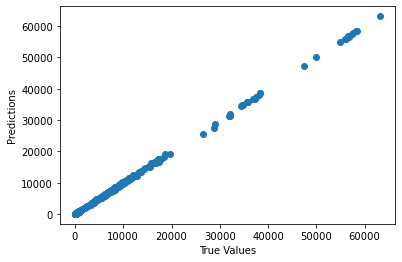

In [31]:

# Create a scatterplot of the real test values versus the predicted values.
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')


In [32]:

# model Evaluation
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 54.24147999317963
MSE: 16699.72446952909
RMSE: 129.22741376940533


In [ ]:

# getting the accuracy
print('r2_score:', metrics.r2_score(y_test, predictions))


/home/retech/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


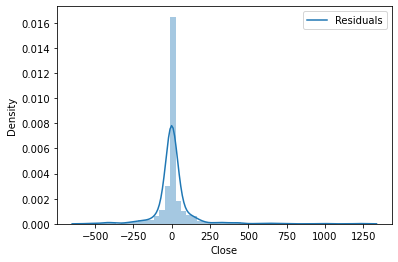

<Figure size 432x288 with 0 Axes>

In [33]:

# plot residuals
sns.distplot((y_test - predictions), bins=50)
# legend
plt.legend(['Residuals'])
plt.show()
# save figure
plt.savefig('plots/residuals.png')